# CITS4403 Project draft code

### Config


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from IPython.display import clear_output
import random

# Agent parameters
NUM_AGENTS = 8

In [2]:
map = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
                [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
                [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
                [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
                [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
                [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
                [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
                [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [3]:
class Cell:
    def __init__(self):
        pass


In [4]:
class Person:
    def __init__(self, map):
        self.map = map
        self.x = 0
        self.y = 0

        self.init_random_position()

    def init_random_position(self):
        while True:
            x = random.randint(0, len(self.map[0]) - 1)
            y = random.randint(0, len(self.map) - 1)
            if self.map[y][x] == 0:
                self.x, self.y = x, y
                break

    def move_randomly(self):
        # Define possible moves: up, down, left, right
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        random.shuffle(moves)

        for move in moves:
            new_x = self.x + move[0]
            new_y = self.y + move[1]
            if 0 <= new_x < len(self.map[0]) and 0 <= new_y < len(self.map):
                # Only move if the new position is not a wall (i.e., map[y][x] == 1 means walkable)
                if self.map[new_y][new_x] == 0:
                    self.x, self.y = new_x, new_y
                    break

In [5]:
class BurnSimulation():
    def __init__(self, map, num_people):
        self.environment = np.array([[Cell() for _ in row] for row in map])

        self.people = []
        for _ in range(num_people):
            self.people.append(Person(map))

    def step(self):
        # Move all people
        for person in self.people:
            person.move_randomly()

    def draw(self):
        height, width = map.shape

        # Draw map
        plt.axis([0, height, 0, width])
        plt.xticks([])
        plt.yticks([])

        options={
            "cmap": 'Greens',
            "alpha": 0.7,
            "vmin": 0, "vmax": 1,
            "interpolation": 'none',
            "origin": 'upper',
            "extent": [0, height, 0, width]
        }

        plt.imshow(map, **options)

        # Draw people as green dots
        for person in self.people:
            plt.plot(person.x + 0.5, height - person.y - 0.5, '.', color='green')

        plt.show()

    def animate(self, frames, interval=None, step=None):
        """Animate the automaton.

        frames: number of frames to draw
        interval: time between frames in seconds
        iters: number of steps between frames
        """
        if step is None:
            step = self.step

        plt.figure()
        try:
            for _ in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                step()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass

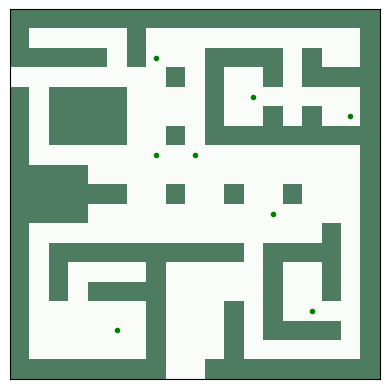

In [6]:
sim = BurnSimulation(map, NUM_AGENTS)

sim.animate(50, 0.1)